# 第9章 教師なし学習

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import scipy
from scipy import stats
from numpy.random import randn  #正規乱数

/home/yuma/.cache/pypoetry/virtualenvs/statistical-learning-with-python-gf79ENdJ-py3.6/lib/python3.6/site-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


## 9.1 K-meansクラスタリング

In [2]:
def k_means(X, K, iteration=20):
    n, p = X.shape
    center = np.zeros((K, p))
    y = np.random.choice(K, n, replace=True)
    scores = []
    for h in range(iteration):
        for k in range(K):
            if np.sum(y == k) == 0:
                center[k, 0] = np.inf
            else:
                for j in range(p):
                    center[k, j] = np.mean(X[y == k, j])
        S_total = 0
        for i in range(n):
            S_min = np.inf
            for k in range(K):
                S = np.sum((X[i, ] - center[k, ])**2)
                if S < S_min:
                    S_min = S
                    y[i] = k
            S_total += S_min
        scores.append(S_total)
    return {'clusters': y, 'scores': scores}

In [3]:
n = 1000
K = 5
p = 2
X = randn(n, p)  #データ生成

Text(0, 0.5, '第2成分')

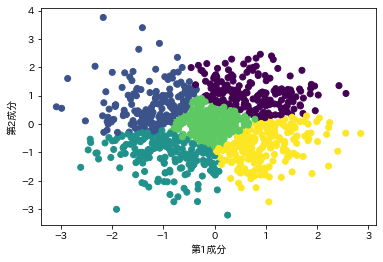

In [4]:
y = k_means(X, 5)['clusters']  #各サンプルのクラスタを得る
#クラスタごとに色を変えて,点を書く
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("第1成分")
plt.ylabel("第2成分")

([<matplotlib.axis.XTick at 0x7f889da0dbe0>,
 <a list of 20 Text major ticklabel objects>)

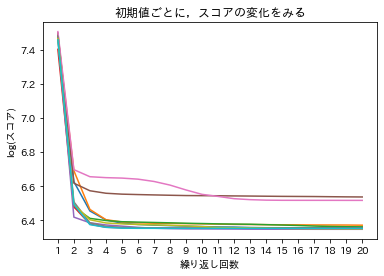

In [5]:
n = 1000
p = 2
X = randn(n, p)
itr = np.arange(1, 21, 1)
for r in range(10):
    scores = k_means(X, 5)['scores']
    plt.plot(itr, np.log(scores))
plt.xlabel("繰り返し回数")
plt.ylabel("log(スコア)")
plt.title("初期値ごとに，スコアの変化をみる")
plt.xticks(np.arange(1, 21, 1))

## 9.2 階層的クラスタリング

In [6]:
def dist_complete(x, y):
    r = x.shape[0]
    s = y.shape[0]
    dist_max = 0
    for i in range(r):
        for j in range(s):
            d = np.linalg.norm(x[i, ] - y[j, ])
            if d > dist_max:
                dist_max = d
    return dist_max

In [7]:
def dist_single(x, y):
    r = x.shape[0]
    s = y.shape[0]
    dist_min = np.inf
    for i in range(r):
        for j in range(s):
            d = np.linalg.norm(x[i, ] - y[j, ])
            if d < dist_min:
                dist_min = d
    return dist_min

In [8]:
def dist_centroid(x, y):
    r = x.shape[0]
    s = y.shape[0]
    x_bar = 0
    for i in range(r):
        x_bar = x_bar + x[i, ]
    x_bar = x_bar / r
    y_bar = 0
    for i in range(s):
        y_bar = y_bar + y[i, ]
    y_bar = y_bar / s
    return (np.linalg.norm(x_bar - y_bar))

In [9]:
def dist_average(x, y):
    r = x.shape[0]
    s = y.shape[0]
    S = 0
    for i in range(r):
        for j in range(s):
            S = S + np.linalg.norm(x[i, ] - y[j, ])
    return (S / r / s)

In [10]:
import copy

In [11]:
def hc(X, dd="complete"):
    n = X.shape[0]
    index = [[i] for i in range(n)]
    cluster = [[] for i in range(n - 1)]
    for k in range(n, 1, -1):
        #index_2=[]
        dist_min = np.inf
        for i in range(k - 1):
            for j in range(i + 1, k):
                i_0 = index[i]
                j_0 = index[j]
                if dd == "complete":
                    d = dist_complete(X[i_0, ], X[j_0, ])
                elif dd == "single":
                    d = dist_single(X[i_0, ], X[j_0, ])
                elif dd == "centroid":
                    d = dist_centroid(X[i_0, ], X[j_0, ])
                elif dd == "average":
                    d = dist_average(X[i_0, ], X[j_0, ])
                if d < dist_min:
                    dist_min = d
                    i_1 = i  #結合される側のlistのindex
                    j_1 = j  #新たに結合するlistのindex
        index[i_1].extend(index[j_1])  #追加する
        if j_1 < k:  #追加したindexの後ろを1つ前に詰める
            for h in range(j_1 + 1, k, 1):
                index[h - 1] = index[h]
        index2 = copy.deepcopy(index[0:(k - 1)])  #indexのまま使うと, 毎回書き換わってしまうため
        cluster[k - 2].extend(index2)
    return cluster  #下から結果を見ると, １つずつ結合が起こっていることがわかる

In [12]:
n = 200
p = 2
X = randn(n, p)
cluster = hc(X, "complete")

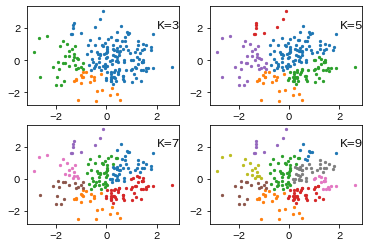

In [13]:
K = [2, 4, 6, 8]  #クラスタ数が3,5,7,9
for i in range(4):
    grp = cluster[K[i]]  #全体の結果から, クラスタ数がK[i]のときの結果を取り出す
    plt.subplot(2, 2, i + 1)
    for k in range(len(grp)):
        x = X[grp[k], 0]
        y = X[grp[k], 1]
        plt.scatter(x, y, s=5)
    plt.text(2, 2, "K={}".format(K[i] + 1), fontsize=12)

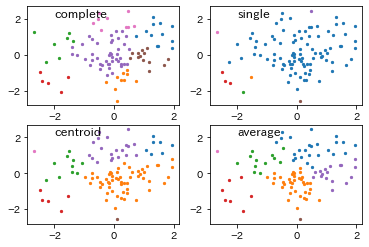

In [14]:
n = 100
p = 2
K = 7
X = randn(n, p)
i = 1
for d in ["complete", "single", "centroid", "average"]:
    cluster = hc(X, dd=d)
    plt.subplot(2, 2, i)
    i = i + 1
    grp = cluster[K - 1]
    for k in range(K):
        x = X[grp[k], 0]
        y = X[grp[k], 1]
        plt.scatter(x, y, s=5)
    plt.text(-2, 2.1, "{}".format(d), fontsize=12)

### 樹形図のプログラム(付録)

In [15]:
import matplotlib.pyplot as plt
import matplotlib.collections as mc
import matplotlib.cm as cm

In [16]:
def unlist(x):
    y = []
    for z in x:
        y.extend(z)
    return (y)

In [17]:
def hc_dendroidgram(cluster, dd="complete", col="black"):
    y = unlist(cluster[0])
    n = len(y)
    z = np.zeros([n, 5])
    index = [[y[i]] for i in range(n)]
    height = np.zeros(n)
    for k in range(n - 1, 0, -1):
        dist_min = np.inf
        for i in range(k):
            i_0 = index[i]
            j_0 = index[i + 1]
            if dd == "complete":
                d = dist_complete(X[i_0, ], X[j_0, ])
            elif dd == "single":
                d = dist_single(X[i_0, ], X[j_0, ])
            elif dd == "centroid":
                d = dist_centroid(X[i_0, ], X[j_0, ])
            elif dd == "average":
                d = dist_average(X[i_0, ], X[j_0, ])
            if d < dist_min:
                dist_min = d
                i_1 = i  #結合される側のlistのindex
                j_1 = i + 1  #新たに結合するlistのindex
        # ここから下で、線分の位置を計算する
        i = 0
        for h in range(i_1):
            i = i + len(index[h])
        z[k, 0] = i + len(index[i_1]) / 2
        z[k, 1] = i + len(index[i_1]) + len(index[j_1]) / 2
        z[k, 2] = height[i_1]
        z[k, 3] = height[j_1]
        z[k, 4] = dist_min
        index[i_1].extend(index[j_1])
        if j_1 < k:  #追加したindexの後ろを1つ前に詰める
            for h in range(j_1, k):
                index[h] = index[h + 1]
                height[h] = height[h + 1]
        height[i_1] = dist_min
        height[k] = 0
        # ループはここまで
    lines = [[(z[k, 0], z[k, 4]), (z[k, 0], z[k, 2])]
             for k in range(1, n)]  # 垂直線分 (左)
    lines2 = [[(z[k, 0], z[k, 4]), (z[k, 1], z[k, 4])]
              for k in range(1, n)]  # 水平線分 (中央)
    lines3 = [[(z[k, 1], z[k, 4]), (z[k, 1], z[k, 3])]
              for k in range(1, n)]  # 垂直線分 (右)
    lines.extend(lines2)
    lines.extend(lines3)
    lc = mc.LineCollection(lines, colors=col, linewidths=1)
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot()
    ax.add_collection(lc)
    ax.autoscale()
    plt.show()
    fig = plt.figure(figsize=(4, 4))

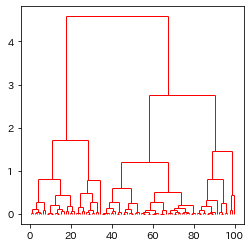

<Figure size 288x288 with 0 Axes>

In [18]:
n = 100
p = 1
X = randn(n, p)
cluster = hc(X, dd="complete")
hc_dendroidgram(cluster, col="red")

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [20]:
X = randn(20, 2)

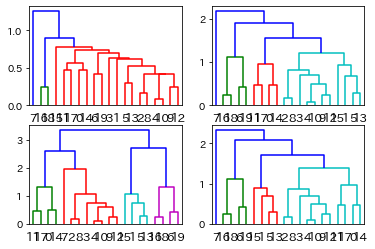

In [21]:
i = 1
for d in ["single", "average", "complete", "weighted"]:
    res_hc = linkage(X, method=d)
    plt.subplot(2, 2, i)
    i += 1
    dendrogram(res_hc)

## 9.3 主成分分析

In [22]:
def pca(X):
    n, p = X.shape
    center = np.average(X, 0)
    X = X - center  #列ごとに中心化
    Sigma = X.T @ X
    lam, phi = np.linalg.eig(Sigma)  #固有値, 固有ベクトル
    index = np.argsort(-lam)  #降順にソート
    lam = lam[index]
    phi = phi[:, index]
    return {'lam': lam, 'vectors': phi, 'centers': center}

In [23]:
X = randn(100, 5)

In [24]:
res = pca(X)

In [25]:
res['lam']

array([142.95547845,  98.77847818,  80.44621193,  77.81064908,
        55.94760267])

In [26]:
res['lam'] / np.sum(res['lam'])  #各主成分の寄与率, 下のevrと同じ

array([0.3135412 , 0.21664873, 0.17644096, 0.17066043, 0.12270868])

In [27]:
res['vectors']

array([[ 0.82749663,  0.0475784 , -0.05511566,  0.4745679 , -0.29108966],
       [-0.31206402,  0.46260006,  0.36106263,  0.08433151, -0.74238751],
       [-0.20046878, -0.582641  ,  0.58993958,  0.51752791,  0.06691705],
       [ 0.38341716,  0.25118713,  0.72011173, -0.42795643,  0.29696581],
       [ 0.17512545, -0.61739127,  0.00253501, -0.56275364, -0.52101921]])

In [28]:
res['centers']

array([ 0.08832514,  0.03738515, -0.11292509,  0.10347601,  0.0022421 ])

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA()
pca.fit(X)  #実行

PCA()

In [31]:
score = pca.fit_transform(X)  #主成分得点(行:n 列:主成分)
score[0:5, ]

array([[ 0.72022833,  0.06588819,  0.22465585, -1.41898072,  0.96841074],
       [-0.91811033, -0.19843475, -0.44798948, -0.11942684,  0.13997133],
       [ 0.1111637 ,  0.84438875,  0.11398861, -0.25432838,  0.65289442],
       [ 0.00906793,  0.20685118,  0.59232208,  0.5048633 ,  0.27849833],
       [-1.2859965 , -1.57954632, -0.61130475, -0.97665173, -1.42745759]])

In [32]:
pca.components_  #上のvectoresの転置(+,-の反対は区別しない), 主成分負荷量 (行:主成分, 列:変数)

array([[-0.82749663,  0.31206402,  0.20046878, -0.38341716, -0.17512545],
       [-0.0475784 , -0.46260006,  0.582641  , -0.25118713,  0.61739127],
       [-0.05511566,  0.36106263,  0.58993958,  0.72011173,  0.00253501],
       [ 0.4745679 ,  0.08433151,  0.51752791, -0.42795643, -0.56275364],
       [ 0.29108966,  0.74238751, -0.06691705, -0.29696581,  0.52101921]])

In [33]:
pca.mean_  #上のcentersと同じ

array([ 0.08832514,  0.03738515, -0.11292509,  0.10347601,  0.0022421 ])

In [34]:
evr = pca.explained_variance_ratio_  #各主成分が全体のどれだけ説明しているか
evr

array([0.3135412 , 0.21664873, 0.17644096, 0.17066043, 0.12270868])

Text(0, 0.5, '寄与率')

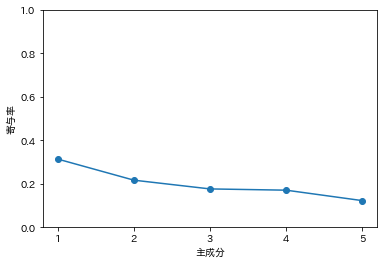

In [35]:
plt.plot(np.arange(1, 6), evr)
plt.scatter(np.arange(1, 6), evr)
plt.xticks(np.arange(1, 6))
plt.ylim(0, 1)
plt.xlabel("主成分")
plt.ylabel("寄与率")

Text(0, 0.5, '累積寄与率')

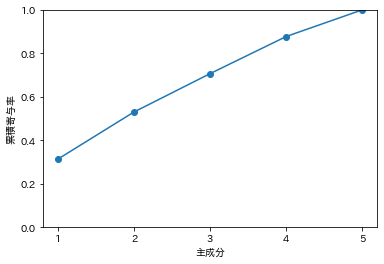

In [36]:
plt.plot(np.arange(1, 6), np.cumsum(evr))
plt.scatter(np.arange(1, 6), np.cumsum(evr))
plt.xticks(np.arange(1, 6))
plt.ylim(0, 1)
plt.xlabel("主成分")
plt.ylabel("累積寄与率")

(-4.0, 4.0)

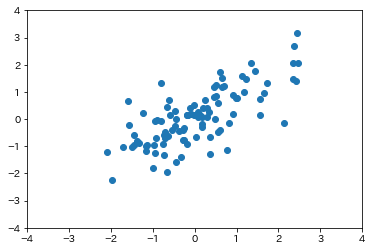

In [37]:
n = 100
a = 0.7
b = np.sqrt(1 - a**2)
u = randn(n)
v = randn(n)
x = u
y = u * a + v * b
plt.scatter(x, y)
plt.xlim(-4, 4)
plt.ylim(-4, 4)

In [38]:
D = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1)), 1)

In [39]:
pca.fit(D)

PCA()

In [40]:
T = pca.components_
T[1, 0] / T[0, 0] * T[1, 1] / T[0, 1]  #主成分ベクトル(主成分負荷量)が直交している

-1.0

In [41]:
def f_1(x):
    y = T[1, 0] / T[0, 0] * x
    return y


def f_2(x):
    y = T[1, 1] / T[0, 1] * x
    return y

In [42]:
x_seq = np.arange(-4, 4, 0.5)

(-4.375, 3.875, -4.231704418234335, 4.576463327302298)

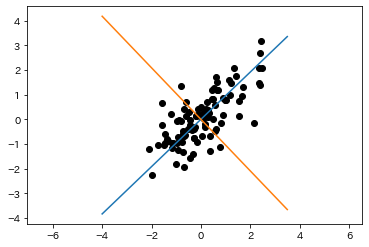

In [43]:
plt.scatter(x, y, c="black")
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.plot(x_seq, f_1(x_seq))
plt.plot(x_seq, f_2(x_seq))
plt.axis('equal')

In [44]:
import pandas as pd
USA = pd.read_csv('USArrests.csv', header=0, index_col=0)
X = (USA - np.average(USA, 0)) / np.std(USA, 0)
index = USA.index
col = USA.columns

In [45]:
pca = PCA(n_components=2)
pca.fit(X)
score = pca.fit_transform(X)
vector = pca.components_
vector

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864]])

In [46]:
vector.shape[1]

4

In [47]:
evr = pca.explained_variance_ratio_
evr

array([0.62006039, 0.24744129])

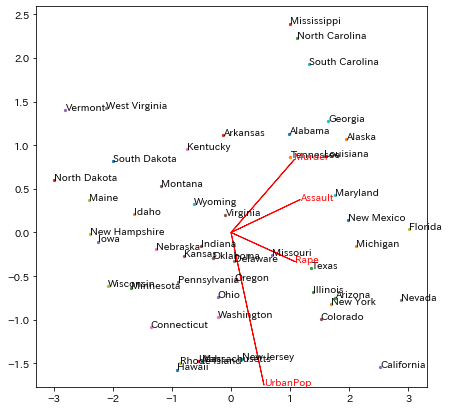

In [48]:
plt.figure(figsize=(7, 7))
for i in range(score.shape[0]):
    plt.scatter(score[i, 0], score[i, 1], s=5)
    plt.annotate(index[i], xy=(score[i, 0], score[i, 1]))
for j in range(vector.shape[1]):
    plt.arrow(0, 0, vector[0, j] * 2, vector[1, j] * 2,
              color="red")  #2は線の長さ, 任意でよい
    plt.text(vector[0, j] * 2, vector[1, j] * 2, col[j], color="red")

In [49]:
from sklearn.datasets import load_boston
Boston = load_boston()

In [50]:
Z = np.concatenate((Boston.data, Boston.target.reshape(-1, 1)), 1)

In [51]:
from sklearn.cluster import KMeans
K_means = KMeans(n_clusters=5)
K_means.fit(Z)
y = K_means.fit_predict(Z)  #どこのクラスタか

In [52]:
pca.fit(Z)
W = pca.fit_transform(Z)[:, [0, 1]]  #各nに対する第１，第２主成分

Text(0.5, 1.0, 'Bostonデータのクラスタリング')

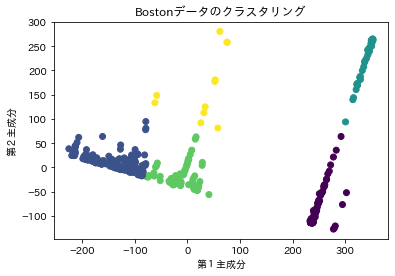

In [53]:
plt.scatter(W[:, 0], W[:, 1], c=y)
plt.xlabel("第１主成分")
plt.ylabel("第２主成分")
plt.title("Bostonデータのクラスタリング")

In [54]:
def pca_regression(X, y, m):
    pca = PCA(n_components=m)
    pca.fit(X)
    Z = pca.fit_transform(X)  #行:n 列: 主成分
    phi = pca.components_  #行: 主成分 列:変数
    theta = np.linalg.inv(Z.T @ Z) @ Z.T @ y
    beta = phi.T @ theta
    return {'theta': theta, 'beta': beta}

In [55]:
n = 100
p = 5
X = randn(n, p)
X = X - np.average(X, 0)

In [56]:
y = X[:, 0] + X[:, 1] + X[:, 2] + X[:, 3] + X[:, 4] + randn(n)
y = y - np.mean(y)

In [57]:
pca_regression(X, y, 3)

{'theta': array([-0.22375845, -2.01801268, -1.03866772]),
 'beta': array([1.28707335, 1.18628402, 0.57982879, 0.91566497, 0.98122491])}

In [58]:
pca_regression(X, y, 5)['beta']

array([1.28887332, 0.98607597, 0.69278101, 0.96354244, 1.10948728])

In [59]:
np.linalg.inv(X.T @ X) @ X.T @ y

array([1.28887332, 0.98607597, 0.69278101, 0.96354244, 1.10948728])